In [31]:
# -*- coding: utf-8 -*-

#importing Keras, Library for deep learning 
import keras
#import pydot 

import IPython
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

from sklearn.preprocessing import StandardScaler
import glob


In [32]:


import os
print(os.listdir("data_hamad/"))


['.DS_Store', '.ipynb_checkpoints', 'data_hamad_Scaled.csv', 'Lattice optimisation-Data_training.csv', 'Lattice_optimisation_DLYusra.h5', 'unseendata_hamad_Scaled.csv', 'unseendata_hamad_Scaled_2.csv']


In [33]:
#DEFINING THE FUNCTIONS

#FUNCTION 1:
def prepare_data(n_train):

    import pandas as pd
    import numpy as np

    train=pd.read_csv('data_hamad/data_hamad_Scaled.csv')
    train.head()

    X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)

    X = np.array(X)
    Y = np.array(Y)
   # scaler = MinMaxScaler()

   # scaler.fit(X)
   # scaler.fit(Y)
    
   # X = scaler.transform(X)
   # Y = scaler.transform(Y)

    xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=n_train)

    return xtrain, xtest, ytrain, ytest


In [34]:
def swish(x):
    return (K.sigmoid(x) * x)
    get_custom_objects().update({'swish': Activation(swish)})

In [35]:

#FUNCTION 2:
def get_base_model(trainX, trainy):
    
    #Building the NN structure
    model = Sequential()
    def swish(x):
        return (K.sigmoid(x) * x)
        get_custom_objects().update({'swish': Activation(swish)})
        #get_custom_objects().update({'swish': Activation(swish)})
    model.add(Dense(units = 50, input_dim = 3, init = 'normal', activation='sigmoid'))
   # model.add(Dense(units = 10, init = 'uniform',activation='tanh'))
    model.add(Dense(3, activation='sigmoid')) #output layer
    
    # Compile model
    model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics=['mse','mae'])
    
    # Fit the model
    history =  model.fit(trainX, trainy, batch_size = 1, epochs = 1000,  validation_split= 0, verbose=1)
    return model



In [36]:
#FUNCTION 3:
def evaluate_model(model, trainX, testX, trainy, testy):
    testscore = model.evaluate(testX, testy, batch_size=1)
    trainscore = model.evaluate(trainX, trainy, batch_size=1)
    return testscore, trainscore
	

# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer (model.summary() to check)
	model.pop()
	# mark all remaining layers as non-trainable
    
    
	#for layer in model.layers:
     #   layer.trainable = False 
        
	# add a new hidden layer
	model.add(Dense(50,input_dim = (None,50), activation='relu'))
	# re-add the output layer
	model.add(output_layer)
	# fit model
	model.fit(trainX, trainy, epochs=1500, verbose=1)
    
    


In [37]:

#Calling the functions
trainscores = dict()
testscores = dict()

trainX, testX, trainy, testy = prepare_data(3)
model= get_base_model(trainX, trainy)
evaluate_model(model, trainX, testX, trainy, testy)


    
model.summary()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, input_dim=3, activation="sigmoid", kernel_initializer="normal")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/1000
12/12 [==============================] - 0s 20ms/step - loss: 0.1246 - mean_squared_error: 0.1246 - mean_absolute_error: 0.3183
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1057 - mean_squared_error: 0.1057 - mean_absolute_error: 0.2876
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0963 - mean_squared_error: 0.0963 - mean_absolute_error: 0.2712
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0901 - mean_squared_error: 0.0901 - mean_absolute_error: 0.2611
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0868 - mean_squared_error: 0.0868 - mean_absolute_error: 0.2492
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0848 - mean_squared_error: 0.0848 - mean_absolute_error: 0.2412
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - mean_absolute_error: 0.2341
Epoch 8/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0727 - mean_squared_error: 0.0727 - mean_absolute_error: 0.2141
Epoch 60/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0729 - mean_squared_error: 0.0729 - mean_absolute_error: 0.2112
Epoch 61/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.2131
Epoch 62/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0720 - mean_squared_error: 0.0720 - mean_absolute_error: 0.2133
Epoch 63/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0722 - mean_squared_error: 0.0722 - mean_absolute_error: 0.2101
Epoch 64/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0715 - mean_squared_error: 0.0715 - mean_absolute_error: 0.2119
Epoch 65/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0715 - mean_squared_error: 0.0715 - mean_absolute_error: 0.2119
Epoch 66/1000
12/12 [======

12/12 [==============================] - 0s 2ms/step - loss: 0.0595 - mean_squared_error: 0.0595 - mean_absolute_error: 0.1951
Epoch 118/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0593 - mean_squared_error: 0.0593 - mean_absolute_error: 0.1942
Epoch 119/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0589 - mean_squared_error: 0.0589 - mean_absolute_error: 0.1943
Epoch 120/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0586 - mean_squared_error: 0.0586 - mean_absolute_error: 0.1957
Epoch 121/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0583 - mean_squared_error: 0.0583 - mean_absolute_error: 0.1944
Epoch 122/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0581 - mean_squared_error: 0.0581 - mean_absolute_error: 0.1944
Epoch 123/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0577 - mean_squared_error: 0.0577 - mean_absolute_error: 0.1956
Epoch 124/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0448 - mean_squared_error: 0.0448 - mean_absolute_error: 0.1734
Epoch 175/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0450 - mean_squared_error: 0.0450 - mean_absolute_error: 0.1714
Epoch 176/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0449 - mean_squared_error: 0.0449 - mean_absolute_error: 0.1698
Epoch 177/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - mean_absolute_error: 0.1699
Epoch 178/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - mean_absolute_error: 0.1681
Epoch 179/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0440 - mean_squared_error: 0.0440 - mean_absolute_error: 0.1696
Epoch 180/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - mean_absolute_error: 0.1702
Epoch 181/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - mean_absolute_error: 0.1526
Epoch 232/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - mean_absolute_error: 0.1522
Epoch 233/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - mean_absolute_error: 0.1519
Epoch 234/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - mean_absolute_error: 0.1531
Epoch 235/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - mean_absolute_error: 0.1504
Epoch 236/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - mean_absolute_error: 0.1487
Epoch 237/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - mean_absolute_error: 0.1495
Epoch 238/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0301 - mean_squared_error: 0.0301 - mean_absolute_error: 0.1380
Epoch 289/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - mean_absolute_error: 0.1367
Epoch 290/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0301 - mean_squared_error: 0.0301 - mean_absolute_error: 0.1350
Epoch 291/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - mean_absolute_error: 0.1375
Epoch 292/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - mean_absolute_error: 0.1357
Epoch 293/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - mean_absolute_error: 0.1364
Epoch 294/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - mean_absolute_error: 0.1349
Epoch 295/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - mean_absolute_error: 0.1281
Epoch 346/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - mean_absolute_error: 0.1274
Epoch 347/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - mean_absolute_error: 0.1268
Epoch 348/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0275 - mean_squared_error: 0.0275 - mean_absolute_error: 0.1270
Epoch 349/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - mean_absolute_error: 0.1267    
Epoch 350/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - mean_absolute_error: 0.1271
Epoch 351/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - mean_absolute_error: 0.1263
Epoch 352/1000
12

12/12 [==============================] - 0s 2ms/step - loss: 0.0266 - mean_squared_error: 0.0266 - mean_absolute_error: 0.1198
Epoch 403/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - mean_absolute_error: 0.1213    
Epoch 404/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0264 - mean_squared_error: 0.0264 - mean_absolute_error: 0.1202
Epoch 405/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - mean_absolute_error: 0.1210
Epoch 406/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - mean_absolute_error: 0.1203
Epoch 407/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0263 - mean_squared_error: 0.0263 - mean_absolute_error: 0.1205
Epoch 408/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0264 - mean_squared_error: 0.0264 - mean_absolute_error: 0.1201
Epoch 409/1000
12

12/12 [==============================] - 0s 2ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - mean_absolute_error: 0.1164
Epoch 460/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - mean_absolute_error: 0.1156
Epoch 461/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - mean_absolute_error: 0.1163
Epoch 462/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0256 - mean_squared_error: 0.0256 - mean_absolute_error: 0.1157
Epoch 463/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0254 - mean_squared_error: 0.0254 - mean_absolute_error: 0.1167
Epoch 464/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0256 - mean_squared_error: 0.0256 - mean_absolute_error: 0.1159    
Epoch 465/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - mean_absolute_error: 0.1159
Epoch 466/1000
12

12/12 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - mean_absolute_error: 0.1140    
Epoch 517/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - mean_absolute_error: 0.1134
Epoch 518/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0248 - mean_squared_error: 0.0248 - mean_absolute_error: 0.1124
Epoch 519/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - mean_absolute_error: 0.1133
Epoch 520/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - mean_absolute_error: 0.1138
Epoch 521/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - mean_absolute_error: 0.1132
Epoch 522/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - mean_absolute_error: 0.1131
Epoch 523/1000
12

12/12 [==============================] - 0s 2ms/step - loss: 0.0247 - mean_squared_error: 0.0247 - mean_absolute_error: 0.1118
Epoch 574/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0247 - mean_squared_error: 0.0247 - mean_absolute_error: 0.1118
Epoch 575/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - mean_absolute_error: 0.1110    
Epoch 576/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0244 - mean_squared_error: 0.0244 - mean_absolute_error: 0.1116
Epoch 577/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - mean_absolute_error: 0.1112
Epoch 578/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - mean_absolute_error: 0.1117
Epoch 579/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - mean_absolute_error: 0.1114
Epoch 580/1000
12

12/12 [==============================] - 0s 2ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - mean_absolute_error: 0.1094
Epoch 630/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - mean_absolute_error: 0.1097
Epoch 631/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - mean_absolute_error: 0.1102
Epoch 632/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0244 - mean_squared_error: 0.0244 - mean_absolute_error: 0.1093
Epoch 633/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - mean_absolute_error: 0.1098
Epoch 634/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - mean_absolute_error: 0.1098
Epoch 635/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - mean_absolute_error: 0.1095
Epoch 636/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0240 - mean_squared_error: 0.0240 - mean_absolute_error: 0.1090
Epoch 687/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0240 - mean_squared_error: 0.0240 - mean_absolute_error: 0.1085
Epoch 688/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - mean_absolute_error: 0.1084
Epoch 689/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - mean_absolute_error: 0.1081
Epoch 690/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - mean_absolute_error: 0.1088
Epoch 691/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - mean_absolute_error: 0.1086    
Epoch 692/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0240 - mean_squared_error: 0.0240 - mean_absolute_error: 0.1090
Epoch 693/1000
12

12/12 [==============================] - 0s 2ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - mean_absolute_error: 0.1078
Epoch 744/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - mean_absolute_error: 0.1072    
Epoch 745/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - mean_absolute_error: 0.1078
Epoch 746/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0236 - mean_squared_error: 0.0236 - mean_absolute_error: 0.1069
Epoch 747/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - mean_absolute_error: 0.1082    
Epoch 748/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - mean_absolute_error: 0.1076
Epoch 749/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - mean_absolute_error: 0.1068
Epoch 750/100

12/12 [==============================] - 0s 3ms/step - loss: 0.0236 - mean_squared_error: 0.0236 - mean_absolute_error: 0.1061
Epoch 801/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0236 - mean_squared_error: 0.0236 - mean_absolute_error: 0.1064
Epoch 802/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0234 - mean_squared_error: 0.0234 - mean_absolute_error: 0.1062
Epoch 803/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - mean_absolute_error: 0.1064
Epoch 804/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - mean_absolute_error: 0.1062
Epoch 805/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - mean_absolute_error: 0.1062
Epoch 806/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - mean_absolute_error: 0.1056
Epoch 807/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0234 - mean_squared_error: 0.0234 - mean_absolute_error: 0.1049
Epoch 858/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - mean_absolute_error: 0.1045    
Epoch 859/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - mean_absolute_error: 0.1056
Epoch 860/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - mean_absolute_error: 0.1047    
Epoch 861/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0234 - mean_squared_error: 0.0234 - mean_absolute_error: 0.1049    
Epoch 862/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - mean_absolute_error: 0.1046    
Epoch 863/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0234 - mean_squared_error: 0.0234 - mean_absolute_error: 0.1049
Epoch

12/12 [==============================] - 0s 2ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - mean_absolute_error: 0.1041
Epoch 915/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - mean_absolute_error: 0.1043
Epoch 916/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - mean_absolute_error: 0.1041
Epoch 917/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - mean_absolute_error: 0.1040
Epoch 918/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - mean_absolute_error: 0.1047
Epoch 919/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - mean_absolute_error: 0.1039
Epoch 920/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - mean_absolute_error: 0.1039
Epoch 921/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - mean_absolute_error: 0.1031
Epoch 972/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - mean_absolute_error: 0.1028
Epoch 973/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - mean_absolute_error: 0.1030
Epoch 974/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - mean_absolute_error: 0.1023
Epoch 975/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - mean_absolute_error: 0.1027
Epoch 976/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - mean_absolute_error: 0.1022
Epoch 977/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - mean_absolute_error: 0.1029
Epoch 978/1000
12/12 

{2: (0.18400880570213, 0.35485514501730603)}
12/12 [==============================] - 0s 1ms/step
(0.18400880570213, 0.35485514501730603)


In [46]:
plt.plot(trainscores.keys(), [trainscores[k][0] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][0] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

AttributeError: 'tuple' object has no attribute 'keys'

In [9]:
print(trainy)

[[0.11582  0.032275 0.069616]
 [0.29402  0.12111  0.2033  ]
 [0.29746  0.1331   0.19427 ]
 [0.047246 0.011982 0.016875]
 [0.42735  0.52947  0.63258 ]
 [0.29554  1.       0.40881 ]
 [0.088482 0.018998 0.029298]
 [0.       0.       0.      ]
 [0.13516  0.042206 0.099699]
 [0.32203  0.14713  0.21614 ]
 [0.95274  0.89529  1.      ]
 [0.087193 0.022884 0.022894]]


In [19]:

# add layer
n_layers = 0
for i in range(n_layers):
    add_layer(model, trainX, trainy)
    
# evaluate model
testscorex, trainscorex = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), testscore, trainscore))
trainscores[len(model.layers)] = (trainscorex[0], trainscorex[2])
testscores[len(model.layers)] = (testscorex[0], testscorex[2])

12/12 [==============================] - 0s 746us/step


NameError: name 'testscore' is not defined

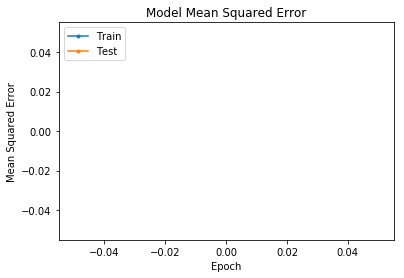

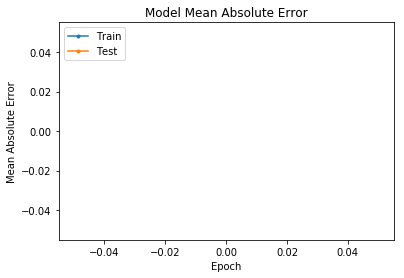

In [11]:
# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][0] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][0] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][1] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][1] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
print(trainy)

[[0.13516  0.042206 0.099699]
 [0.088482 0.018998 0.029298]
 [0.29554  1.       0.40881 ]
 [0.95274  0.89529  1.      ]
 [0.11582  0.032275 0.069616]
 [0.       0.       0.      ]
 [0.52481  0.16267  0.35035 ]
 [0.29402  0.12111  0.2033  ]
 [0.28923  0.44765  0.28959 ]
 [0.29746  0.1331   0.19427 ]
 [0.087193 0.022884 0.022894]
 [0.047246 0.011982 0.016875]]


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 153       
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [30]:
    import pandas as pd
    import numpy as np

    #train=pd.read_csv('data_hamad/unseendata_hamad_Scaled.csv')
    train=pd.read_csv('data_hamad/data_hamad_Scaled.csv')
    train.head()
    X=train
    X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)


    #scaler = MinMaxScaler()

   # scaler.fit(X)
    #scaler.fit(Y)
    
   # X = scaler.transform(X)
   # Y2 = scaler.transform(Y)
    print(X)

    Feature  Feature.1  Feature.2
0    1.0000    0.37288     0.5000
1    0.2027    0.74577     0.7973
2    0.7973    0.74577     0.7973
3    0.7973    0.74577     0.2027
4    0.5000    1.00000     0.5000
5    0.5000    0.37288     1.0000
6    0.7973    0.00000     0.2027
7    0.5000    0.37288     0.5000
8    0.2027    0.74577     0.2027
9    0.0000    0.37288     0.5000
10   0.5000    0.37288     0.0000
11   0.5000    0.37288     0.5000
12   0.7973    0.00000     0.7973
13   0.5000    0.37288     0.5000
14   0.2027    0.00000     0.7973


In [31]:
y_hamad_predition_shallow=model.predict(X)

In [32]:
print(y_hamad_predition_shallow)

[[ 0.5353031   0.5491941   0.51237684]
 [ 0.00397894 -0.23128006 -0.07504855]
 [ 0.30762658  0.07848218  0.25345328]
 [ 0.46450135  0.343918    0.38984773]
 [ 0.20437708 -0.09913597  0.10098234]
 [ 0.1447156   0.05705878  0.12502614]
 [ 0.5538769   0.8290807   0.52925456]
 [ 0.27553663  0.2855753   0.23525739]
 [ 0.1566059   0.0320479   0.05864158]
 [ 0.01533791  0.02613655 -0.0443626 ]
 [ 0.40749407  0.52346694  0.3397425 ]
 [ 0.27553663  0.2855753   0.23525739]
 [ 0.39602593  0.54248357  0.40923825]
 [ 0.27553672  0.2855752   0.2352572 ]
 [ 0.08500566  0.23170133  0.07791784]]


In [33]:
pd.DataFrame({'real'  'real2'  'real3' : list(y_hamad_predition_shallow)} ) .to_csv('results_hamad_DrMaterial_shallow.csv',index=True)

In [34]:

model.save('Lattice_optimisation_DLYusra_shallow.h5')



In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 153       
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [36]:
for layer in model.layers:
    Weights=layer.get_weights()[0]
    Biases=layer.get_weights()[1]
print (Weights)
print (Biases)

[[ 0.03185911  0.06027041  0.25544557]
 [ 0.1587919   0.16357718 -0.01830246]
 [ 0.19269182 -0.03761342  0.33855417]
 [ 0.21625096 -0.06105623 -0.32559848]
 [-0.00488761 -0.13286914 -0.15027896]
 [-0.14800924 -0.06243105 -0.07177782]
 [-0.078518   -0.19856572  0.17998004]
 [-0.27496347  0.31638885 -0.14867449]
 [ 0.20497458 -0.05075631  0.17700256]
 [ 0.21664298  0.1405302   0.114461  ]
 [ 0.09799586 -0.04230175  0.28289402]
 [ 0.03363994  0.17866711  0.23930109]
 [-0.22024736  0.03939478 -0.17741024]
 [-0.203846   -0.20171015  0.06042786]
 [-0.16381532 -0.26433522 -0.27098638]
 [ 0.32903197  0.28707105  0.24395344]
 [-0.09366143  0.28221503  0.26435623]
 [ 0.35817713  0.00728734 -0.16624202]
 [-0.20220041  0.21851994 -0.19328742]
 [ 0.38690895  0.1998662   0.2555118 ]
 [-0.27084535 -0.24835066 -0.0352384 ]
 [ 0.32725242  0.12132378 -0.04684195]
 [-0.12531936 -0.18898678 -0.06542376]
 [ 0.18228829 -0.06613357  0.06342901]
 [-0.16299787 -0.2811056  -0.24814324]
 [-0.13021044  0.18539436

In [37]:
#Save model weights and biases
model.save_weights("Lattice_optimisation_DLYusraWeights.h5")